# <font color = LightGreen > **CA model of water dynamics and hydrophobic interactions** </font>

Authors:
- H. Malash, 15179192
- S. Bhusal, 14724383
- L. Pahladsingh, 13846566
- T. Glansdorp, 12748587

In [7]:
from model import CA_rules, CA_grid, CA_rules_only_water
import analysis
import numpy as np
import matplotlib.pyplot as plt
import random

## <font color = LightBlue > **Background Information** </font>

Our cellular automaton (CA) model simulating an aqueous solution consists of a grid, representing the surface of a torus. Each cell, denoted as '$\textit{i}$' is surrounded by four neighbors '$\textit{j}$ ', and there is an additional cell two positions beyond '$\textit{i}$ ', labeled as '$\textit{k}$ '. We interpret the cell indicated by 'j' as the von Neumann neighborhood, and the cell indicated by 'k' as the extended von Neumann neighborhood.

The state of each cell, represented by binary numbers, signifies its occupancy. There are three possible options for occupancy within the system:

- An empty cell is denoted by 0.
- A cell containing water is indicated by 1.
- A cell containing solute is indicated by 2.

In our model, two parameters influence the movement of molecules within the grid: the $\textbf{breaking probability}$ ($P_B$) and the $\textbf{joining probability}$ ($J$). The combination of these probabilities determines the behavior of cell movement.

The $\textbf{breaking probability}$ ($P_B$) represents the probability of a molecule in cell $\textit{i}$ breaking away from a molecule in cell $\textit{j}$ when only one $\textit{j}$ cell is occupied. We have defined three specific breaking probabilities:

- $P_B(W)$: Water-water breaking probability
- $P_B(L)$: Solute-solute breaking probability
- $P_B(WL)$: Water-solute breaking probability

The  $\textbf{joining probability}$ ($J$) quantifies the ratio between the likelihood of a molecule at $\textit{i}$  moving towards an occupied $\textit{k}$ cell when $\textit{j}$  is empty and the probability of the same molecule at $\textit{i}$  moving towards an empty $\textit{k}$  cell when $\textit{j}$  is unoccupied. 

 is a positive number, when ($J=1$), it indicated that a molecule at $\textit{i}$ has the same probability to move towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. So the state of cell $\textit{k}$ does not matter. 

The parameter ($J$) is a positive number. When $J=1$, it signifies that a molecule at $\textit{i}$ has an equal probability of moving towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. In this case, the state of cell $\textit{k}$ does not influence the movement probability. As before we have three distinct joining probabilities: $J(W)$, $J(L)$ and $J(WL)$.

### <font> **Moving probability** </font> 
Combining $P_B$ and $J$, we obtaining the moving probability of a cell $p_m$: </br>
$p_m$ = sum of $p_m(d)$ over all possible $\textit{d}$ if the sum <1,
else 1 </br>

with

$p_m(d) = 1 / (1 + ((4-n)/(P_B^n) - 1) / J(d)) $ </br>
if n < 4 and $P_B$ > 0  </br>

$\textit{n}$ indicating the number of occupied $\textit{j}$ cells, there are $4-n$ directions for $\textit{i}$ to move. 

In the case where $J=1$, the moving probability ($p_m$) is equal to $P_B^n$. Given that all our research accepts this condition, we will focus on working with joint probabilities involving only $P_B$ to calculate the moving probability of a molecule.

$\textit{Information mainly based on}$: </br>
Kier, L. B., & Cheng, C. K. (1994). A Cellular Automata Model of an Aqueous Solution, Journal of Chemical Information and Computer Science.  34, 1334-1337


## <font color = LightBlue > **Water Grid** </font>

## <font color = LightBlue > **Water-Solute Grid** </font>

### <font color = Pink > **Influence of Water temperature on solubility** </font>

### <font color = Pink > **Influence of Solute Concentration** </font>

In [15]:
from analysis import calculate_attributes

solute_concentrations = [100, 500] #, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
results = []
runs = 5

all_results = {solute: [] for solute in solute_concentrations}
total_molecules = 2087 # 55x55x0.69

for solute_amount in solute_concentrations:
    
    solute_results = []

    for run in range(runs):
        print(f"Running simulation with {solute_amount} solute molecules.")
        ca_grid = CA_grid(solute_amount=solute_amount)
        ca_rules = CA_rules(ca_grid, pbwl=0.8)

        final_grid = ca_rules.generate_simulation()

        f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
        solute_results.append(np.array([f_o, f_1, f_2, f_3, f_4]))

    solute_results = np.array(solute_results)

    average_results = np.mean(solute_results, axis=0)
    std_dev_results = np.std(solute_results, axis=0)

    all_results[solute_amount] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for solute, data in all_results.items():
    print(f"Solute concentration: {solute}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()


Running simulation with 100 solute molecules.
Running simulation with 100 solute molecules.
Running simulation with 100 solute molecules.
Running simulation with 100 solute molecules.
Running simulation with 100 solute molecules.
Running simulation with 500 solute molecules.
Running simulation with 500 solute molecules.
Running simulation with 500 solute molecules.
Running simulation with 500 solute molecules.
Running simulation with 500 solute molecules.
Solute concentration: 100
Average: [0.00143747 0.02309535 0.14681361 0.37115477 0.40958313]
Standard Deviation: [0.00080178 0.00221451 0.00780069 0.0087022  0.0131551 ]

Solute concentration: 500
Average: [0.01034978 0.08816483 0.24015333 0.2798275  0.14192621]
Standard Deviation: [0.0010757  0.00372388 0.00910852 0.00906607 0.00571303]



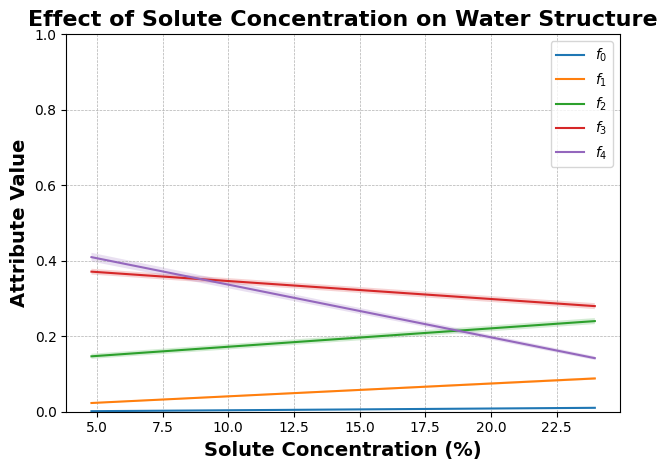

In [16]:
for i, attribute in enumerate(['$f_0$', '$f_1$', '$f_2$', '$f_3$', '$f_4$']):
    averages = [all_results[solute]['average'][i] for solute in solute_concentrations]
    std_devs = [all_results[solute]['std_dev'][i] for solute in solute_concentrations]
    
    num_runs = 5
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    plt.plot(np.array(solute_concentrations) / 2087 * 100, averages, label=attribute)
    plt.fill_between(np.array(solute_concentrations) / 2087 * 100, lower_bound, upper_bound, alpha=0.2)

    
plt.xlabel('Solute Concentration (%)', fontsize=14, fontweight='bold')
plt.ylabel('Attribute Value', fontsize=14, fontweight='bold')
plt.ylim(0, 1)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Effect of Solute Concentration on Water Structure', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  


### <font color = Pink > **Influence of Water-Solute Breaking Probability** </font>

### Counting of unbound water molecules

In [4]:
see_grid = CA_rules_only_water(CA_grid()).generate_simulation()
plt.imshow(see_grid)
plt.show()
total_height = 55
total_width = 55

unbound_water = analysis.count_unbound_water(see_grid, total_height, total_width)

NameError: name 'CA_rules_only_water' is not defined